*import dependencies*



In [1]:
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
import cv2

In [5]:
import tensorflow_hub as hub

In [6]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

*preprocessing image and load*

In [7]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [8]:
content_image = load_image('vltc.png')
style_image = load_image('robot.jpg')

*visualize output*

In [9]:
content_image.shape

TensorShape([1, 1200, 2500, 3])

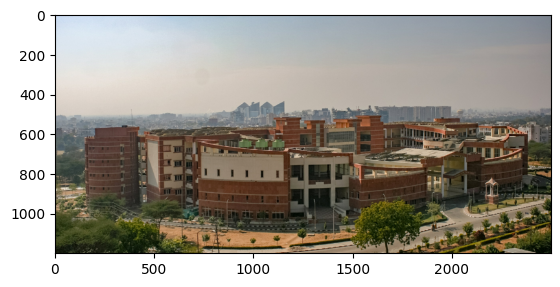

In [10]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [11]:
style_image.shape

TensorShape([1, 460, 820, 3])

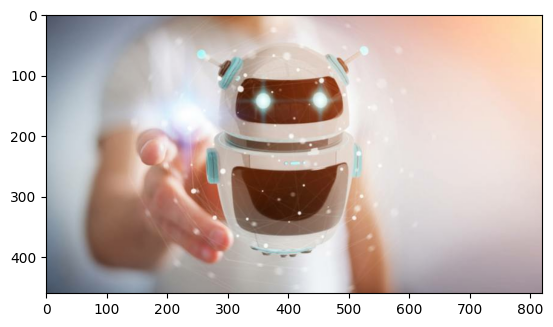

In [12]:
plt.imshow(np.squeeze(style_image))
plt.show()

*stylize image*

In [13]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

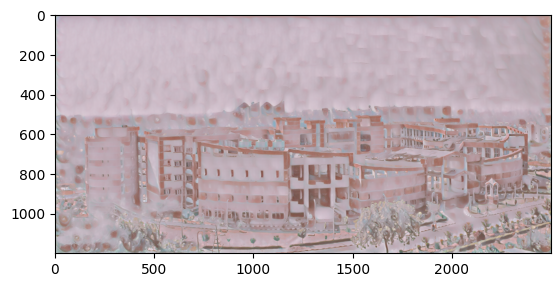

In [14]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [15]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True